In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# importing Datasets

In [5]:
URL="dataset/Information.csv"
data_initial =pd.read_csv(URL,encoding='ISO-8859-1')
data_initial.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [7]:
data_initial.description.head()

0                                i sing my own rhythm.
1    I'm the author of novels filled with family dr...
2                  louis whining and squealing and all
3    Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
Name: description, dtype: object

In [8]:
data_initial.text.head()

0    Robbie E Responds To Critics After Win Against...
1    ÛÏIt felt like they were my friends and I was...
2    i absolutely adore when louis starts the songs...
3    Hi @JordanSpieth - Looking at the url - do you...
4    Watching Neighbours on Sky+ catching up with t...
Name: text, dtype: object

# Data Cleaning

In [9]:
data=pd.read_csv(URL,encoding='ISO-8859-1',
                 usecols=["gender","gender:confidence","profile_yn","profile_yn:confidence","description","text"],
                na_values=["not_available","NA",'nan','na','unavailable','unknown',-1])
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


In [10]:
data.describe()

,gender:confidence,profile_yn:confidence
count,20024.000000,20050.000000
mean,0.882756,0.993221
std,0.191403,0.047168
min,0.000000,0.627200
25%,0.677800,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [11]:
data["gender"].unique()

array(['male', 'female', 'brand', nan], dtype=object)

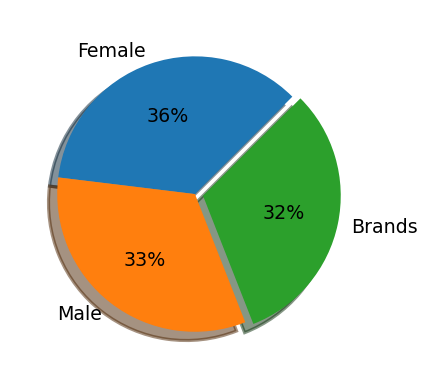

In [12]:
#pie chart visualisation of category of Users
users=data.gender.value_counts()
male_users_1=users["male"]
female_users_1=users["female"]
brand_1=users["brand"]

gender=["Female","Male","Brands"]
size=[female_users_1,male_users_1,brand_1]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

In [13]:
users

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [14]:
data[data["gender"] == "brand"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 6 to 20042
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5942 non-null   object 
 1   gender:confidence      5942 non-null   float64
 2   profile_yn             5942 non-null   object 
 3   profile_yn:confidence  5942 non-null   float64
 4   description            4328 non-null   object 
 5   text                   5942 non-null   object 
dtypes: float64(2), object(4)
memory usage: 325.0+ KB


In [15]:
data=data[data.gender != "brand"]
data

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
...,...,...,...,...,...,...
20045,female,1.0000,yes,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too..."
20046,male,1.0000,yes,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...
20047,male,1.0000,yes,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...
20048,female,0.8489,yes,1.0,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...


In [16]:
#don't touch this cell
print(data.shape)
data.dropna(inplace=True)

(14108, 6)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 11194 non-null  object 
 1   gender:confidence      11194 non-null  float64
 2   profile_yn             11194 non-null  object 
 3   profile_yn:confidence  11194 non-null  float64
 4   description            11194 non-null  object 
 5   text                   11194 non-null  object 
dtypes: float64(2), object(4)
memory usage: 612.2+ KB


# Data Validation

In [18]:
data.isnull().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [19]:
data.isna().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [20]:
data[data["gender:confidence"]==0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [21]:
data[data["description"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [22]:
data[data["text"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


# Data Preprocessing

#### Label Encoding :  <br><br>["male" ,"yes"] -> 1 and<br><br> ["Female","no"] -> 0

In [23]:
data.gender.replace({"male":1,"female":0},inplace=True)
data.profile_yn.replace({"yes":1,"no":0},inplace=True)

In [24]:
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,1,1.0000,1,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,1,1.0000,1,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,1,0.6625,1,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,1,1.0000,1,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,0,1.0000,1,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


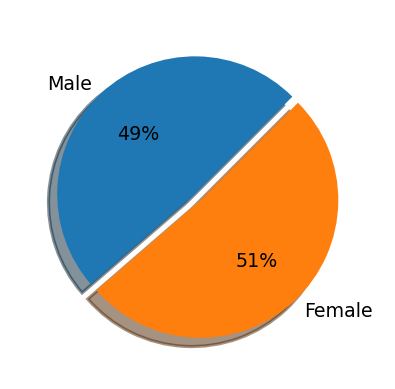

In [25]:
#pie chart visualisation of male users and female users
users=data.gender.value_counts()
male_users=users[1]
female_users=users[0]

gender=["Male","Female"]
size=[male_users,female_users]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

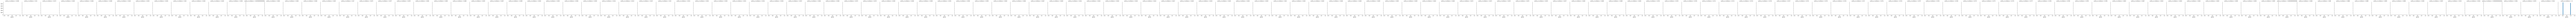

In [36]:
pt=sns.FacetGrid(data,col='profile_yn:confidence')
pt.map(plt.hist, 'gender', bins=20)
plt.show()

### Natural Language Processing

In [74]:
from sklearn.preprocessing import normalize
#download punkt and wordnet if its your First time :) else ignore
#nltk.download('punkt')
#nltk.download('wordnet')

In [40]:
# you cal also download from nltk.download('stopwords') then stop_words=set(stopwords.words('english'))
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [41]:
#important functions for removing unusual words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

In [42]:
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [65]:
#working
sentance="Hola ! We are Venom and we are here to protect you (Scrcasm) Hope you will enjoy with us. BTW We are Kidding"
sentance=re.sub(r'[!,.@#$%&<>?:;()]',"",sentance)
words=word_tokenize(sentance)
words

['Hola',
 'We',
 'are',
 'Venom',
 'and',
 'we',
 'are',
 'here',
 'to',
 'protect',
 'you',
 'Scrcasm',
 'Hope',
 'you',
 'will',
 'enjoy',
 'with',
 'us',
 'BTW',
 'We',
 'are',
 'Kidding']

In [66]:
#removing Stopwords
filtered_words =[word for word in words if not word in stopwords]
filtered_words

['Hola',
 'We',
 'Venom',
 'protect',
 'Scrcasm',
 'Hope',
 'will',
 'enjoy',
 'us',
 'BTW',
 'We',
 'Kidding']

In [67]:
#removing punctuations 
final_words=[stemmer.stem(word) for word in filtered_words]
final_words

['hola',
 'We',
 'venom',
 'protect',
 'scrcasm',
 'hope',
 'will',
 'enjoy',
 'us',
 'btw',
 'We',
 'kid']

In [85]:
#you can also lemmatize it but it will increase time of Execution +20000 mS
lammitizer.lemmatize("kidding",pos='v')

'kid'

In [ ]:
#final message
def cleaning(message):
    message=re.sub(r'[!,.@#$%&<>?:;()]',"",message)
    words=word_tokenize(sentance)
    filtered_words =[stemmer.stem(word) for word in words if not word in stopwords]
    return filtered_words